In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [2]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

Timer unit: 1e-09 s

Total time: 0.0273835 s
File: /mnt/d/ariel2/code/core/ariel_gp.py
Function: get_prediction_internal at line 762

Line #      Hits         Time  Per Hit   % Time  Line Contents
   762                                               @kgs.profile_each_line
   763                                               def get_prediction_internal(self,obs):
   764         1      58914.0  58914.0      0.2          output = np.zeros((self.number_of_observations, self.number_of_instances))        
   765         1    1377400.0    1e+06      5.0          transit_depths = self.depth_model.get_prediction(self.obs_wavelength)
   766         1      23205.0  23205.0      0.1          mean_wavelength = np.mean(self.wavelengths) # should be taking mean over AIRS wavelengths only
   767         2        783.0    391.5      0.0          for i_instance in range(self.number_of_instances):
   768       284      34368.0    121.0      0.1              for i_wavelength in range(len(self.wavelengths)

_     ._   __/__   _ _  _  _ _/_   Recorded: 13:19:50  Samples:  4732
 /_//_/// /_\ / //_// / //_'/ //     Duration: 8.540     CPU time: 8.358
/   _/                      v5.1.1

Line in cell [5]

8.539 <cell line: 0>  /tmp/ipykernel_32216/104135229.py:1
`- 8.539 PredictionModel.infer  kaggle_support.py:650
   `- 8.539 PredictionModel._infer  kaggle_support.py:667
      `- 8.534 PredictionModel._infer_single  ariel_gp.py:432
         |- 7.290 fit_gp  ariel_gp.py:325
         |  |- 6.714 solve_gp_nonlinear  gp.py:1265
         |  |  |- 6.414 solve_gp  gp.py:1176
         |  |  |  |- 4.120 CompoundNamed.get_prior_matrices  gp.py:172
         |  |  |  |  |- 3.919 CompoundNamed.get_observation_relationship_internal  gp.py:601
         |  |  |  |  |  `- 3.883 <listcomp>  gp.py:602
         |  |  |  |  |     `- 3.883 CompoundNamed.get_prior_matrices  gp.py:172
         |  |  |  |  |        `- 3.859 CompoundNamed.get_observation_relationship_internal  gp.py:601
         |  |  |  |  |           `- 3.833 <listcomp>  gp.py:602
         |  |  |  |  |              `- 3.833 CompoundNamed.get_prior_matrices  gp.py:172
         |  |  |  |  |                 `- 3.829 CompoundNamed.get_observation_relationship_internal  gp.py:601
         |  |  |  |  |                    |- 3.107 <listcomp>  gp.py:602
         |  |  |  |  |                    |  `- 3.107 TransitModel.get_prior_matrices  gp.py:172
         |  |  |  |  |                    |     |- 2.852 TransitModel.get_observation_relationship_internal  ariel_gp.py:688
         |  |  |  |  |                    |     |  |- 2.042 TransitModel.get_prediction  gp.py:230
         |  |  |  |  |                    |     |  |  `- 2.035 TransitModel.get_prediction_internal  <decorator-gen-125>:1
         |  |  |  |  |                    |     |  |     `- 2.035 profile_each_line  kaggle_support.py:170
         |  |  |  |  |                    |     |  |        |- 1.740 wrapper  line_profiler/line_profiler.py:146
         |  |  |  |  |                    |     |  |        |  `- 1.740 TransitModel.get_prediction_internal  ariel_gp.py:762
         |  |  |  |  |                    |     |  |        |     |- 1.321 TransitParams.light_curve  ariel_transit.py:112
         |  |  |  |  |                    |     |  |        |     |  |- 0.727 TransitModel.light_curve  batman/transitmodel.py:444
         |  |  |  |  |                    |     |  |        |     |  |  `- 0.676 _quadratic_ld  <built-in>
         |  |  |  |  |                    |     |  |        |     |  `- 0.436 TransitModel.__init__  batman/transitmodel.py:74
         |  |  |  |  |                    |     |  |        |     |     `- 0.359 _rsky  <built-in>
         |  |  |  |  |                    |     |  |        |     `- 0.217 [self]  ariel_gp.py
         |  |  |  |  |                    |     |  |        `- 0.269 LineProfiler.print_stats  line_profiler/line_profiler.py:164
         |  |  |  |  |                    |     |  |              [6 frames hidden]  line_profiler, linecache, <frozen gen...
         |  |  |  |  |                    |     |  |- 0.291 TransitParams.light_curve_derivatives  ariel_transit.py:134
         |  |  |  |  |                    |     |  |  `- 0.201 TransitParams.light_curve  ariel_transit.py:112
         |  |  |  |  |                    |     |  |     `- 0.091 TransitModel.light_curve  batman/transitmodel.py:444
         |  |  |  |  |                    |     |  |- 0.192 [self]  ariel_gp.py
         |  |  |  |  |                    |     |  `- 0.150 csc_matrix.__init__  scipy/sparse/_compressed.py:30
         |  |  |  |  |                    |     |     `- 0.118 coo_matrix.__init__  scipy/sparse/_coo.py:30
         |  |  |  |  |                    |     `- 0.220 ModelSplitSensors.get_observation_relationship_internal  ariel_gp.py:848
         |  |  |  |  |                    |        |- 0.104 ParameterScaler.get_prior_matrices  gp.py:172
         |  |  |  |  |                    |        |  `- 0.101 ParameterScaler.g
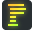

Score:           -12.7309
RMS error FGS:   2146.35167 ppm
mRMS error FGS:  2146.35167 ppm
RMS error AIRS:  1036.31992 ppm
mRMS error AIRS: 1036.31992 ppm
RMS error AIRSv: 1035.70828 ppm
mRMS error AIRSv:1035.70828 ppm
CPU times: user 8.94 s, sys: 704 ms, total: 9.65 s
Wall time: 10.8 s


(-12.730923266697388, 0.002146351671888508, 0.0010363199215807533)

In [5]:
%%time
import gp
import ariel_gp
import ariel_load_FGS
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=True
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.use_training_labels = False
model.starter_model.do_plots = False
model.plot_final = False
model.plot_simple = False
#model.model_options.include_background = False
#model.model_options.n_iter = 4
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
model.starter_model.loaders = model.loaders


loaders = model.starter_model.loaders
#loaders[0].cache_steps= []
# loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
# loaders[0].apply_wavelength_binning.n_mean_pixels = 0
# loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# old_weights = copy.deepcopy(ariel_load_FGS.FGS_weights)
# ariel_load_FGS.FGS_weights *= 0
# ariel_load_FGS.FGS_weights[0,0] = old_weights[0,0]
#print(ariel_load_FGS.FGS_weights)
#ariel_load_FGS.FGS_weights[3] = 1
#model.model_options.FGS_order = 3
#model.model_options.AIRS_order = 3
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
data = [train_data[[d.planet_id for d in train_data].index(1843015807)]] # ingress and egress obscured
1349926825
#data = train_data[1:2]
data = [train_data[[d.planet_id for d in train_data].index(1349926825)]]
#data = train_data[1003:1004]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
data= copy.deepcopy(data)
for d in data:
    d.load_to_step(5,model.loaders)
    #d.transits[0].data[1].noise_est*=1000
#print('!!!')
#d.transits = d.transits[1:]
%pyinstrument inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
# model.starter_model.do_plots = False
# inferred_data_simple = model.starter_model.infer(data)
# kgs.score_metric(inferred_data_simple, data)

In [6]:
%debug

> /home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/numpy/core/shape_base.py(449)stack()
    447     shapes = {arr.shape for arr in arrays}
    448     if len(shapes) != 1:
--> 449         raise ValueError('all input arrays must have the same shape')
    450 
    451     result_ndim = arrays[0].ndim + 1



ipdb>  u


> /mnt/d/ariel2/code/core/ariel_gp.py(707)get_observation_relationship_internal()
    705             #design_matrix_rp[self.inds_per_wavelength[i_wavelength], i_wavelength] = val
    706             this_transit_params.Rp = None
--> 707         design_matrix_rp = np.stack(vals,axis=1)
    708         design_matrix_rp = gp.sparse_matrix(design_matrix_rp)
    709         design_matrix_rp = design_matrix_rp @ prior_matrices.design_matrix



ipdb>  vals


[array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0., -0., -0.]), array([-0., -0., -0., ..., -0.,

ipdb>  [v.shape for v in vals]


[(1350,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), (1125,), 

ipdb>  q


In [ ]:
m = copy.deepcopy(model)
m.results['model_mean'].clear_all_caches()
m.results['model_samples'].clear_all_caches()
kgs.dill_save(kgs.temp_dir + 'test.pickle', m.results)

In [ ]:
# data2 = copy.deepcopy(data)
# data2[0].transits = data2[0].transits[1:]
# inferred_data2 = model.infer(data2)

In [ ]:
# plt.figure()
# plt.plot(3*(inferred_data2[0].spectrum - inferred_data[0].spectrum))
# plt.plot(data[0].spectrum-np.mean(data[0].spectrum))
# plt.figure()


In [ ]:
# plt.figure()
# plt.plot(data[0].spectrum - inferred_data[0].spectrum)
# plt.figure()
# xx = data[0].spectrum
# plt.plot(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0])
# # plt.plot(np.diff(data[0].spectrum))
# plt.plot((data[0].spectrum - inferred_data[0].spectrum))
# plt.figure()
# plt.scatter(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0], data[0].spectrum - inferred_data2[0].spectrum)
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum), (data[0].spectrum - inferred_data[0].spectrum)[:-1])
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum,n=2), (data[0].spectrum - inferred_data[0].spectrum)[:-2])

In [ ]:
import ariel_load
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_pixel_corrections.mask_hot = False
ariel_load.raw_data_diagnostics(copy.deepcopy(data[0]), 0, loaders)

In [ ]:
%debug